In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv(r"/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
df.shape

(1000, 16)

In [8]:
df['parental_education_level']=df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [9]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

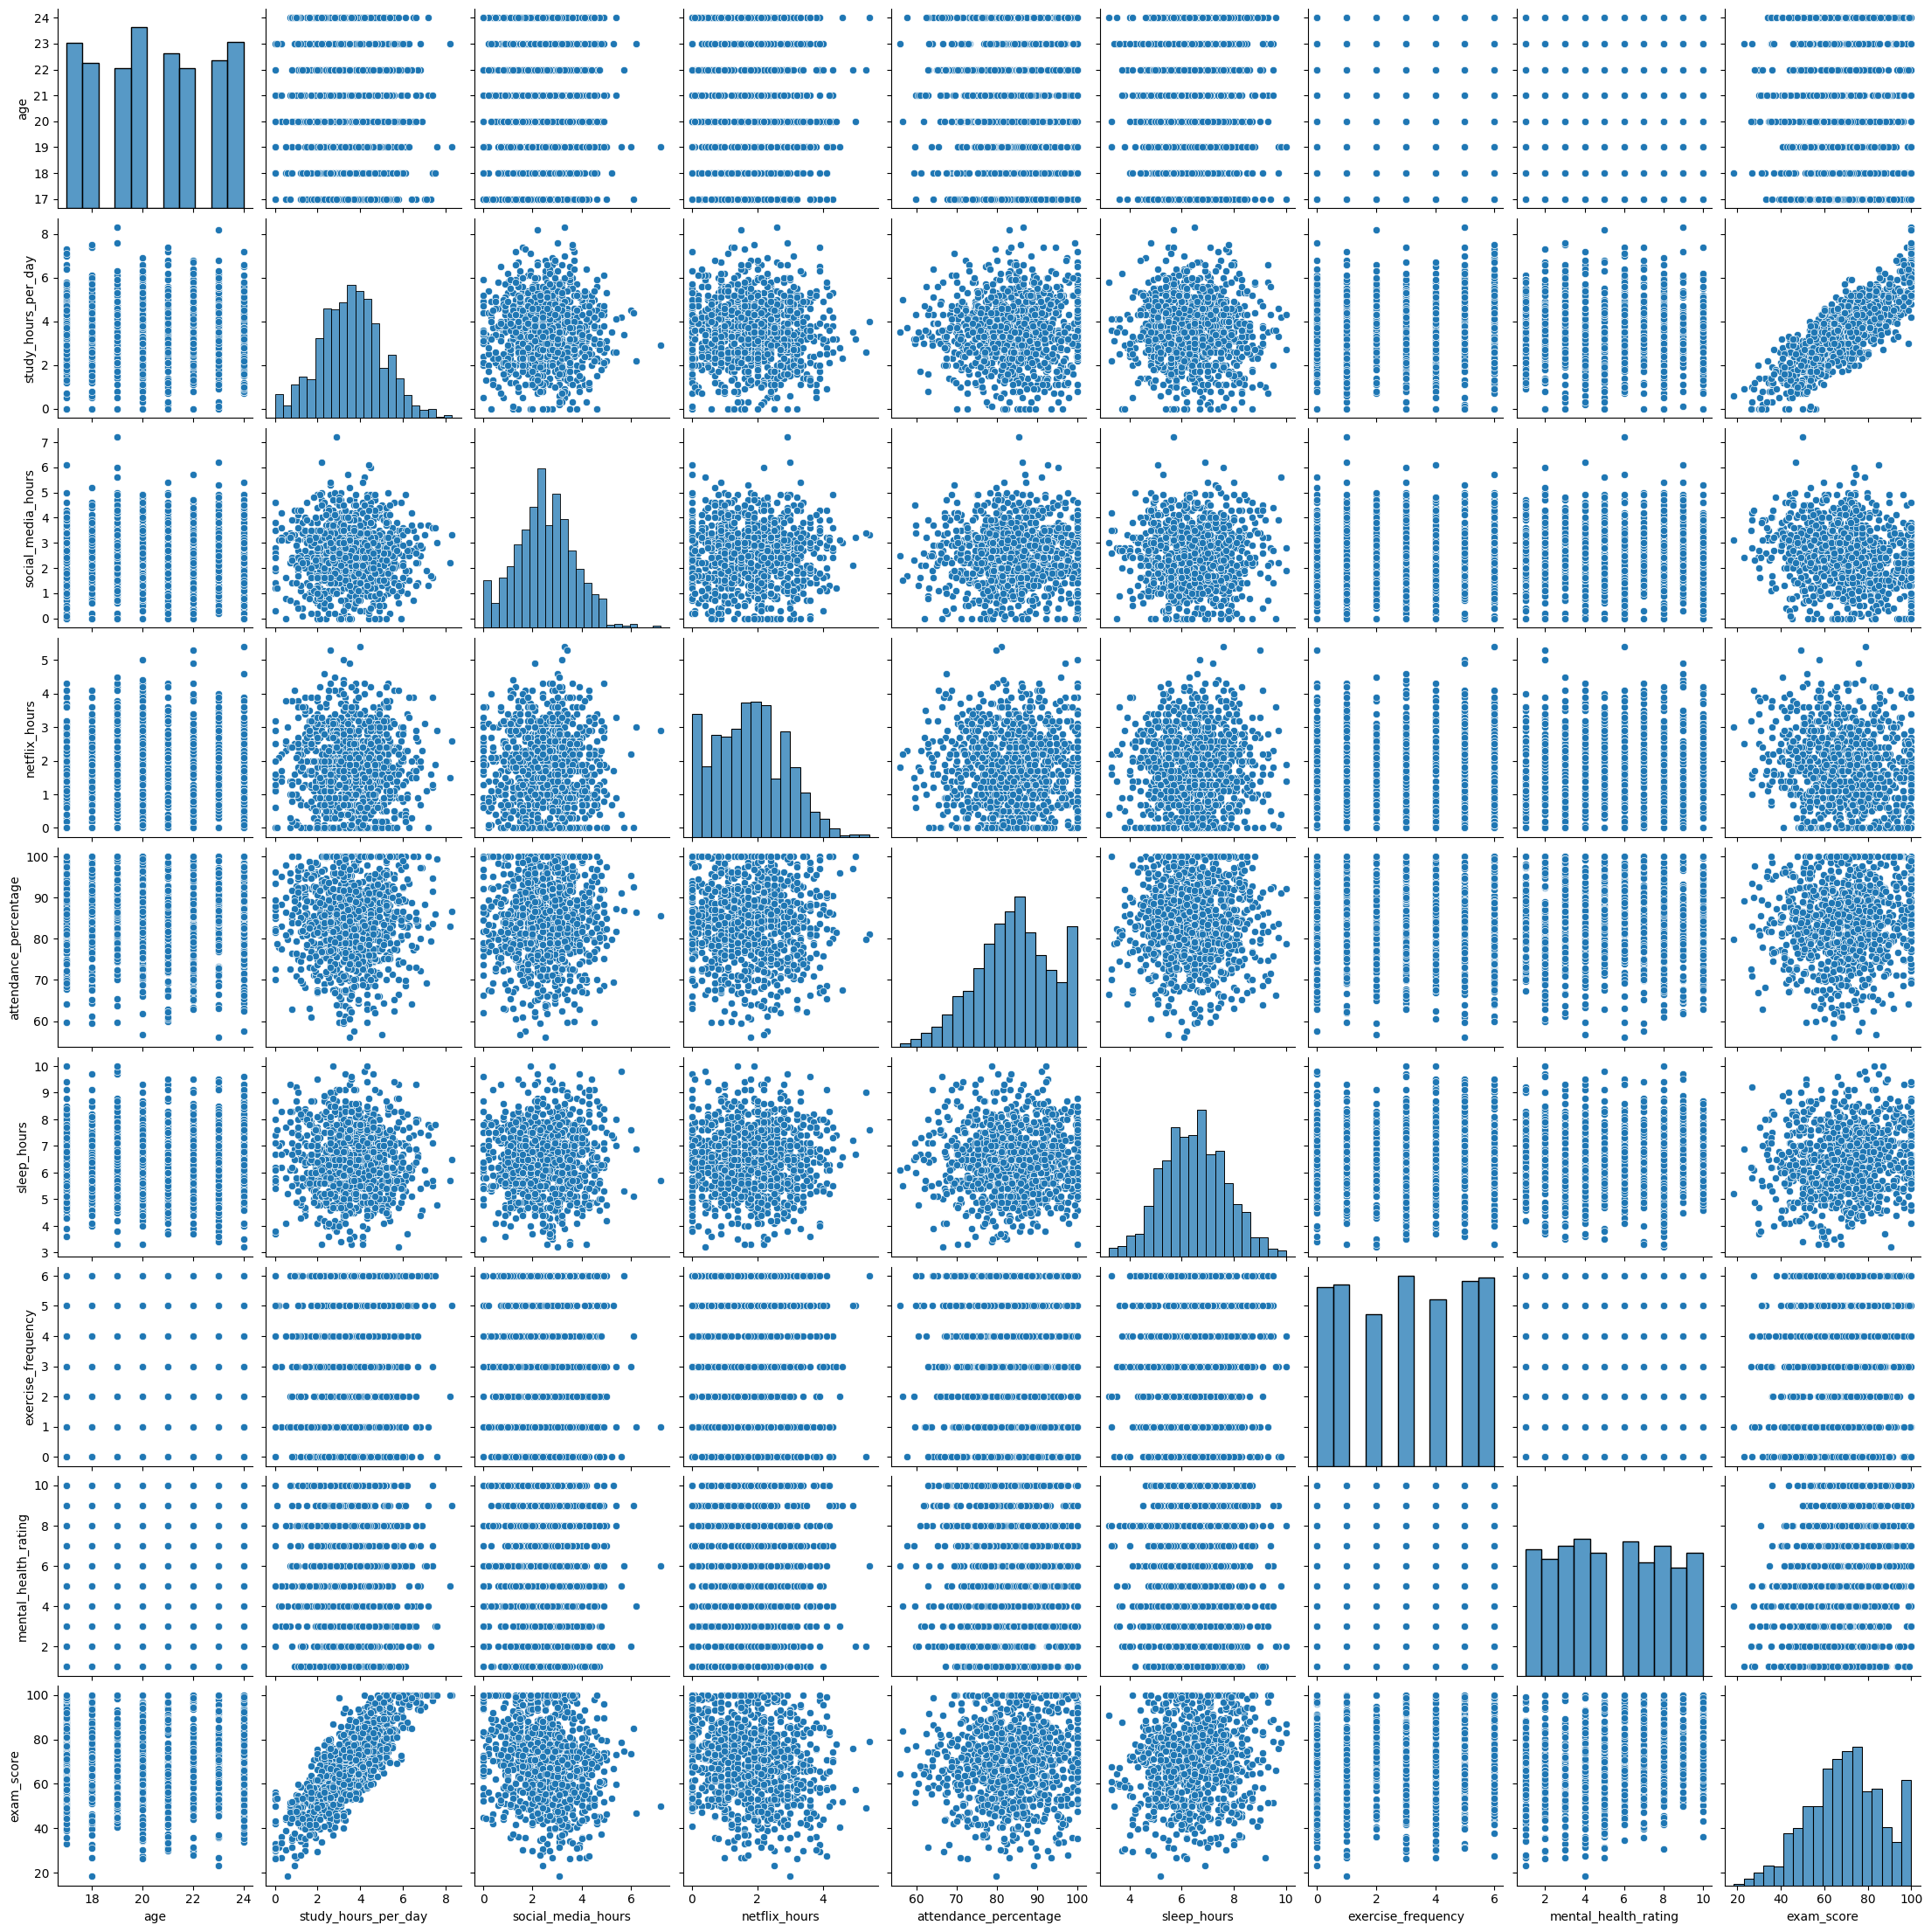

In [10]:
sns.pairplot(df)
plt.show()

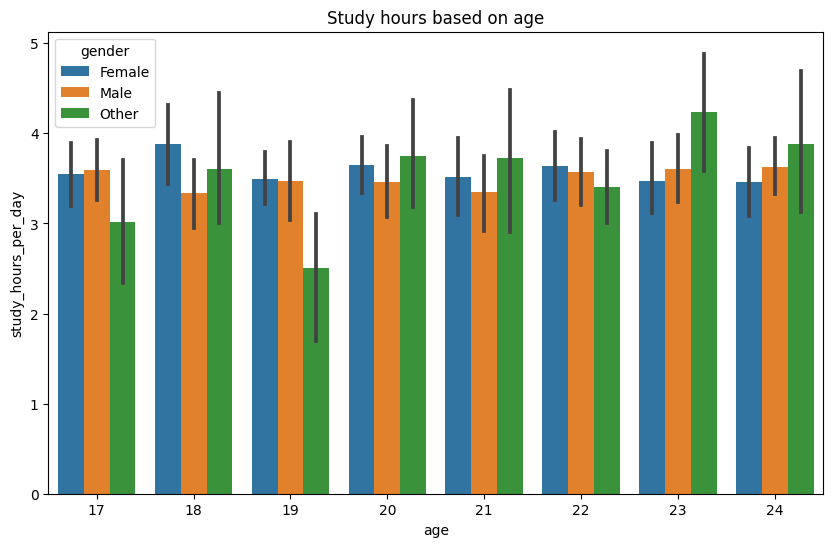

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='age',y='study_hours_per_day',data=df,hue="gender")
plt.title("Study hours based on age")
plt.show()

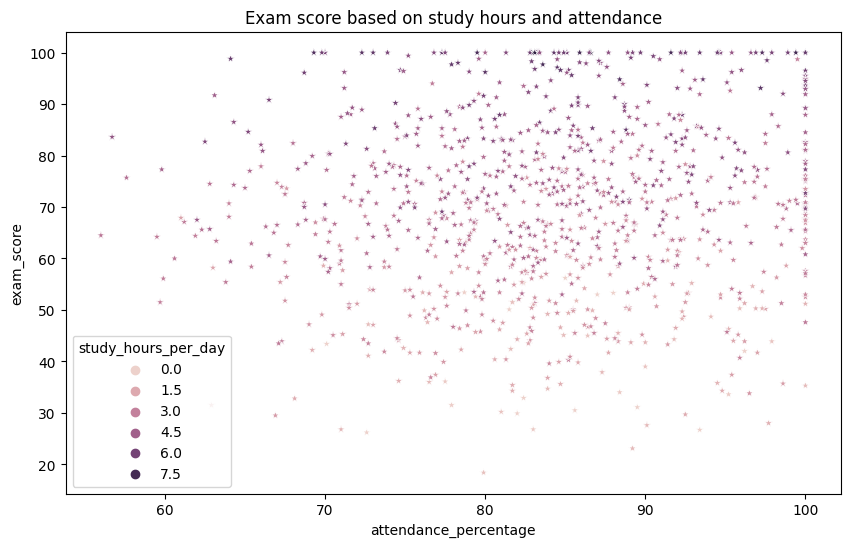

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='attendance_percentage',y='exam_score',data=df,hue="study_hours_per_day",marker='*')
plt.title("Exam score based on study hours and attendance")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


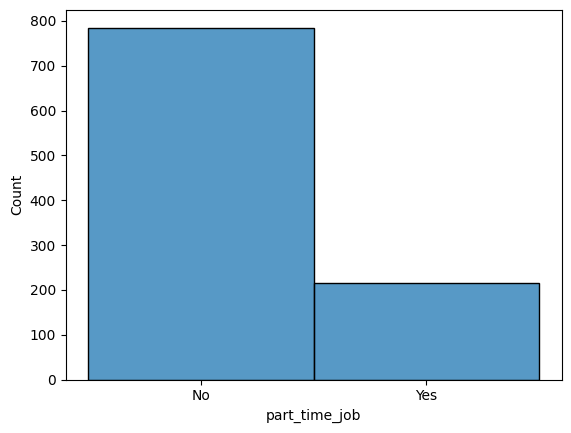

In [13]:
sns.histplot(x='part_time_job',data=df)
plt.show()

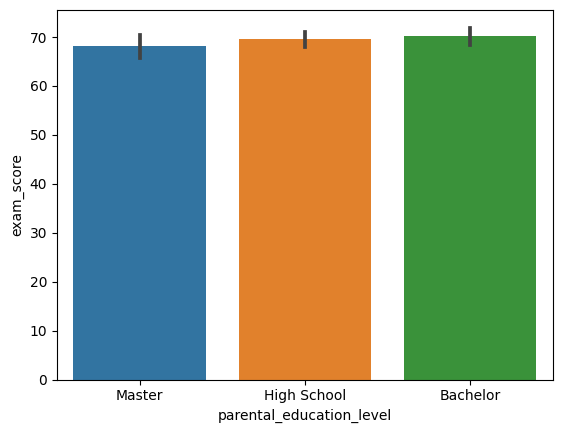

In [14]:
sns.barplot(x='parental_education_level',y='exam_score',data=df)
plt.show()

In [15]:
le=LabelEncoder()
for i in('gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation'):
    df[i]=le.fit_transform(df[i])
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,S1998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7


In [16]:
df.drop(columns=('student_id'),inplace=True)
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7


In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=lr_model.predict(x_test)
y_pred

array([ 66.31668955,  75.07979504,  77.67895426,  73.91362743,
        61.64026898,  54.42540178,  76.05827155,  55.65760084,
        41.29821536,  72.84834431,  40.97071583, 102.3421184 ,
        58.08177817,  72.04165666,  35.8173712 ,  57.46699712,
        73.34017066,  69.1957929 ,  65.83473515,  50.19868604,
        55.96198924,  62.75546608,  51.10962578,  88.06033546,
        69.62032383,  71.34271711,  68.94051882,  56.24765615,
        69.64552564,  68.14930776,  65.17213732,  78.9290414 ,
        64.0606515 ,  81.46492979,  60.79762619,  51.07653799,
        70.60564642,  58.73664672,  65.03050011,  97.50146833,
        50.32149347,  85.58502486,  67.47872728,  64.13818999,
        94.3851699 ,  82.47571915,  53.00703108,  79.34464953,
        63.58660728,  64.68282654,  66.33393651,  47.15801758,
        71.1735137 ,  77.73955316,  45.04238517,  75.70438677,
        73.48194658,  69.0030237 ,  64.30439704,  48.83316619,
        86.08646705,  75.46156241,  75.90023314,  46.71

In [21]:
print("Root mean squared error :",r2_score(y_test,y_pred)*100)

Root mean squared error : 89.66663721200842


In [22]:
print(" mean squared error :",mean_squared_error(y_test,y_pred))

 mean squared error : 26.497748783647193


In [23]:
new_data=[[23,1,1.3,4.1,1.3,0,95.8,8.0,2,1,1,2,1,0]]

In [24]:
pred=lr_model.predict(new_data)
pred

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.0461428])